In [1]:
import re           #regular expression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open('D:\ml\project\Hawk\ch.txt','r',encoding='utf-8')
# UTF-8 is a widely used character encoding that can represent most characters in the Unicode standard.

In [3]:
dataset = f.read()

In [4]:
print(dataset)

29/09/23, 2:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
29/09/23, 2:19 pm - Ayush: <Media omitted>
29/09/23, 2:19 pm - Ayush: <Media omitted>
29/09/23, 2:19 pm - Ayush: Team Eco-Path
29/09/23, 2:20 pm - Ayush: Team leader change hoga esmai sparsh singhal ki jgh Ayush Jindal kr de
29/09/23, 2:32 pm - Raghav: Okk dekhta hu
29/09/23, 2:36 pm - Ayush: Hm jo internal hua tha usmai change hona h
29/09/23, 2:36 pm - Ayush: Esmai toh apna fill kr diya
29/09/23, 2:37 pm - Raghav: Thik hai
29/09/23, 11:11 pm - Ayush: Our mentor didn't get the mail yet
29/09/23, 11:28 pm - Raghav: Okk



In [5]:
# regular expression of whatsapp message
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [6]:
# pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)(AM|PM|am|pm)? -'

In [7]:
messages = re.split(pattern, dataset)[1:]
print(messages)
# [1:] is used to remove the empty string that comes in first of this message

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Ayush: <Media omitted>\n', 'Ayush: <Media omitted>\n', 'Ayush: Team Eco-Path\n', 'Ayush: Team leader change hoga esmai sparsh singhal ki jgh Ayush Jindal kr de\n', 'Raghav: Okk dekhta hu\n', 'Ayush: Hm jo internal hua tha usmai change hona h\n', 'Ayush: Esmai toh apna fill kr diya\n', 'Raghav: Thik hai\n', "Ayush: Our mentor didn't get the mail yet\n", 'Raghav: Okk\n']


In [8]:
dates = re.findall(pattern,dataset)
for i in range(len(dates)):
    dates[i] = dates[i].replace('-','').replace(',','')
dates

['29/09/23 2:19\u202fpm  ',
 '29/09/23 2:19\u202fpm  ',
 '29/09/23 2:19\u202fpm  ',
 '29/09/23 2:19\u202fpm  ',
 '29/09/23 2:20\u202fpm  ',
 '29/09/23 2:32\u202fpm  ',
 '29/09/23 2:36\u202fpm  ',
 '29/09/23 2:36\u202fpm  ',
 '29/09/23 2:37\u202fpm  ',
 '29/09/23 11:11\u202fpm  ',
 '29/09/23 11:28\u202fpm  ']

In [9]:
df = pd.DataFrame({'user_message':messages, 'date':dates})
df['date'] = pd.to_datetime(df['date'])
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-09-29 14:19:00
1,Ayush: <Media omitted>\n,2023-09-29 14:19:00
2,Ayush: <Media omitted>\n,2023-09-29 14:19:00
3,Ayush: Team Eco-Path\n,2023-09-29 14:19:00
4,Ayush: Team leader change hoga esmai sparsh si...,2023-09-29 14:20:00


In [10]:
df.shape

(11, 2)

In [11]:
# seperates users and messages
users = []
message = []
for m in df['user_message']:
    entry = re.split('([\w\W]+?):\s',m)
    if entry[1:]:
        users.append(entry[1])
        message.append(entry[2])
    else:
        users.append('group_notification')
        message.append(entry[0])
df['user']=users
df['message']=message
df.drop(columns='user_message',inplace=True)
df
# this is possible by seeing if : come then before : is user and after : is message

,date,user,message
0,2023-09-29 14:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-09-29 14:19:00,Ayush,<Media omitted>\n
2,2023-09-29 14:19:00,Ayush,<Media omitted>\n
3,2023-09-29 14:19:00,Ayush,Team Eco-Path\n
4,2023-09-29 14:20:00,Ayush,Team leader change hoga esmai sparsh singhal k...
5,2023-09-29 14:32:00,Raghav,Okk dekhta hu\n
6,2023-09-29 14:36:00,Ayush,Hm jo internal hua tha usmai change hona h\n
7,2023-09-29 14:36:00,Ayush,Esmai toh apna fill kr diya\n
8,2023-09-29 14:37:00,Raghav,Thik hai\n
9,2023-09-29 23:11:00,Ayush,Our mentor didn't get the mail yet\n


In [12]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute 
df

,date,user,message,year,month,day,hour,minute
0,2023-09-29 14:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,September,29,14,19
1,2023-09-29 14:19:00,Ayush,<Media omitted>\n,2023,September,29,14,19
2,2023-09-29 14:19:00,Ayush,<Media omitted>\n,2023,September,29,14,19
3,2023-09-29 14:19:00,Ayush,Team Eco-Path\n,2023,September,29,14,19
4,2023-09-29 14:20:00,Ayush,Team leader change hoga esmai sparsh singhal k...,2023,September,29,14,20
5,2023-09-29 14:32:00,Raghav,Okk dekhta hu\n,2023,September,29,14,32
6,2023-09-29 14:36:00,Ayush,Hm jo internal hua tha usmai change hona h\n,2023,September,29,14,36
7,2023-09-29 14:36:00,Ayush,Esmai toh apna fill kr diya\n,2023,September,29,14,36
8,2023-09-29 14:37:00,Raghav,Thik hai\n,2023,September,29,14,37
9,2023-09-29 23:11:00,Ayush,Our mentor didn't get the mail yet\n,2023,September,29,23,11


In [13]:
# for counting how much this person message anyone
df[df['user']=='Ayush'].shape[0]

7

In [14]:
# for counting total number of words
selected_user='Ayush'
df_user=df[df['user']==selected_user.replace('\n',' ')]
df_user
words=[]
for i in df_user['message']:
    words.extend(i.split())
len(words)

41

In [16]:
# checking media message
df[df['message']== '<Media omitted>\n'].shape[0]

2

In [17]:
# checking link message
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in .")

In [18]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [19]:
len(y)

0

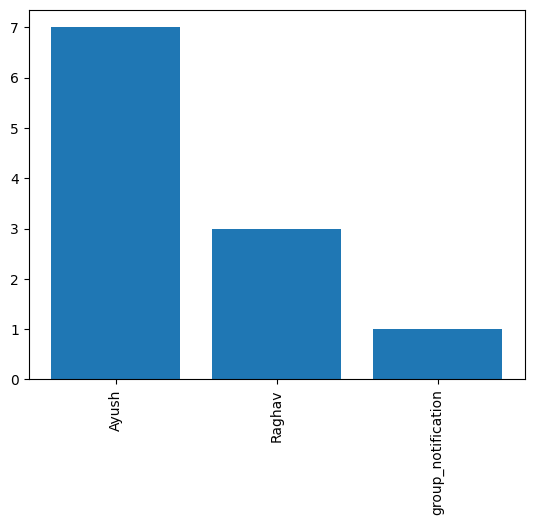

In [22]:
# checking the contribution of user in group message
z=df['user'].value_counts().head() 
name = z.index
count = z.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
# checking in percentage contribution
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'Name','user':'Percentage'})

,Name,Percentage
0,Ayush,63.64
1,Raghav,27.27
2,group_notification,9.09


In [ ]:
# wordcloud
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df_wc=wc.generate(df['message'].str.cat(sep=' '))
df_wc


AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

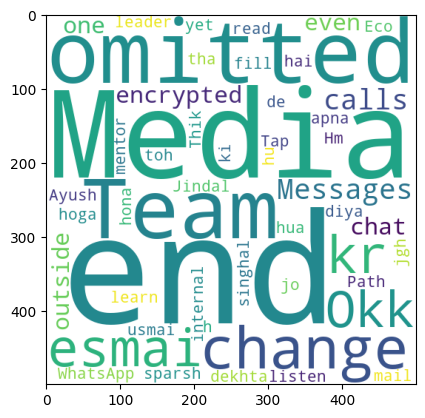

In [ ]:
fig,ax=plt.subplots()
ax.imshow(df_wc)
plt.pyplot(fig)

In [24]:
df_new=df[df['message']!='<Media omitted>\n']['message']
dfc=[]
for i in df_new:
    if(i.find('joined using this group')==-1):
        dfc.append(i)
dfc = pd.Series(dfc)

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df_wc=wc.generate(dfc.str.cat(sep=' '))
df_wc

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

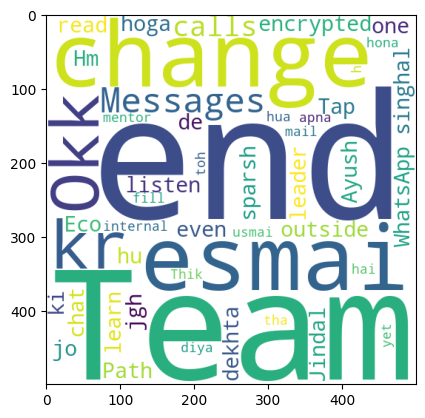

In [ ]:
fig,ax=plt.subplots()
ax.imshow(df_wc)
plt.pyplot(fig)

In [ ]:
# Most common words used
from collections import Counter

In [ ]:
f=open('D:\ml\project\Hawk\stop_hinglish.txt','r')
stop_word=f.read()
# Removing group notification messages
temp=df[df['user']!='group_notification']
# Removing media messages
temp=temp[temp['message']!='<Media omitted>\n']
# removing stop words messages like a , the ,etc
words=[]

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_word:
            words.append(word)
dfv=pd.DataFrame(Counter(words).most_common(20))    
dfv

,0,1
0,team,2
1,change,2
2,esmai,2
3,okk,2
4,eco-path,1
5,leader,1
6,sparsh,1
7,singhal,1
8,jgh,1
9,ayush,1


<Axes: xlabel='0', ylabel='1'>

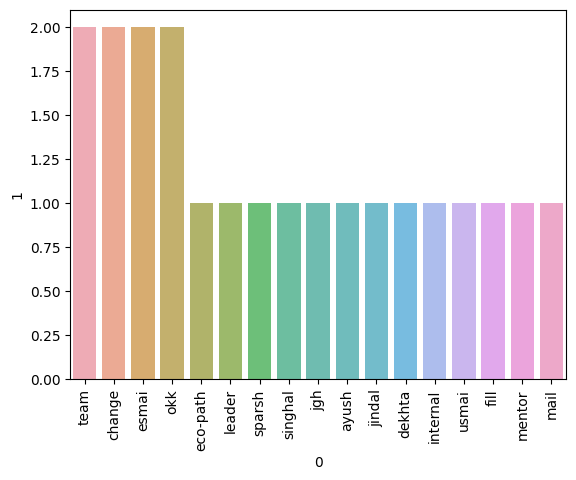

In [ ]:
plt.xticks(rotation='vertical')
sns.barplot(x=dfv[0],y=dfv[1],alpha = 0.8)


In [ ]:
import emoji

In [ ]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [ ]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

""


In [ ]:
df['month_num']=df['date'].dt.month
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-09-29 14:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,September,29,14,19,9
1,2023-09-29 14:19:00,Ayush,<Media omitted>\n,2023,September,29,14,19,9
2,2023-09-29 14:19:00,Ayush,<Media omitted>\n,2023,September,29,14,19,9
3,2023-09-29 14:19:00,Ayush,Team Eco-Path\n,2023,September,29,14,19,9
4,2023-09-29 14:20:00,Ayush,Team leader change hoga esmai sparsh singhal k...,2023,September,29,14,20,9
5,2023-09-29 14:32:00,Raghav,Okk dekhta hu\n,2023,September,29,14,32,9
6,2023-09-29 14:36:00,Ayush,Hm jo internal hua tha usmai change hona h\n,2023,September,29,14,36,9
7,2023-09-29 14:36:00,Ayush,Esmai toh apna fill kr diya\n,2023,September,29,14,36,9
8,2023-09-29 14:37:00,Raghav,Thik hai\n,2023,September,29,14,37,9
9,2023-09-29 23:11:00,Ayush,Our mentor didn't get the mail yet\n,2023,September,29,23,11,9


In [ ]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2023,9,September,11


In [ ]:
df['only_date']=df['date'].dt.date
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2023-09-29,11
